[View in Colaboratory](https://colab.research.google.com/github/tcglarry/alibaba_manufacturing_competition/blob/master/ali_classifier_defect_not_defect_make_train_data.ipynb)

In [1]:
"""For Alibaba Competition

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/10DYDNSM_eaFtn7lrM0CyUIXRFdIDtabS
"""

# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse






Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

In [0]:

# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()


In [3]:

# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


KeyboardInterrupt: ignored

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code
Enter your authorization code:
··········
Mounted at /content/drive


In [25]:
!ls drive/Drive

ls: cannot access 'drive/Drive': No such file or directory


In [13]:

!mkdir -p drive
!google-drive-ocamlfuse drive
!ls drive

/bin/bash: google-drive-ocamlfuse: command not found


In [0]:
!cp 'drive/My Drive/kaggle/ali/manu_big_data/train_sample_total.zip' .

In [18]:
#!cp drive/kaggle/ali/manu_big_data/train_sample_total.zip .

cp: cannot stat 'drive/kaggle/ali/manu_big_data/train_sample_total.zip': No such file or directory


In [30]:
!ls

adc.json  drive  sample_data  train_sample_total.zip


In [6]:

!unzip train_sample_total.zip


Archive:  train_sample_total.zip
   creating: train_sample_total/
  inflating: train_sample_total/正常20180914144614对照样本_02.jpg  
   creating: __MACOSX/
   creating: __MACOSX/train_sample_total/
  inflating: __MACOSX/train_sample_total/._正常20180914144614对照样本_02.jpg  
  inflating: train_sample_total/横条压凹20180903105700对照样本_02.jpg  
  inflating: __MACOSX/train_sample_total/._横条压凹20180903105700对照样本_02.jpg  
  inflating: train_sample_total/漏底20180912160315对照样本_02.jpg  
  inflating: __MACOSX/train_sample_total/._漏底20180912160315对照样本_02.jpg  
  inflating: train_sample_total/碰伤20180905092240对照样本_02.jpg  
  inflating: __MACOSX/train_sample_total/._碰伤20180905092240对照样本_02.jpg  
  inflating: train_sample_total/正常20180915150646对照样本_02.jpg  
  inflating: __MACOSX/train_sample_total/._正常20180915150646对照样本_02.jpg  
  inflating: train_sample_total/碰伤20180907111235对照样本_02.jpg  
  inflating: __MACOSX/train_sample_total/._碰伤20180907111235对照样本_02.jpg  
  inflating: train_sample_total/正常20180915154327对照样本_02

In [6]:
!ls

adc.json  drive  __MACOSX  MobileNetV2.h5  sample_data	train_sample_total


In [7]:
!pip install --upgrade keras

    100% |████████████████████████████████| 307kB 21.3MB/s 
    100% |████████████████████████████████| 51kB 22.6MB/s 
  Found existing installation: Keras 2.1.6
    Uninstalling Keras-2.1.6:
      Successfully uninstalled Keras-2.1.6


In [8]:

import keras
print (keras.__version__)
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import subprocess
import os
import pickle
import sklearn 

from sklearn.model_selection import train_test_split

from xgboost.sklearn import XGBClassifier




import keras.backend as K

from keras.applications.inception_v3 import InceptionV3
from keras.applications.densenet import DenseNet121
#from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenetv2 import MobileNetV2
#from keras.applications.nasnet import NASNetMobile,NASNetLarge
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.preprocessing.image import ImageDataGenerator,  img_to_array, load_img



from keras.applications.xception import Xception, preprocess_input

from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Input, Conv2D, MaxPooling2D, merge, Lambda,UpSampling2D, concatenate, Reshape, Dropout,Cropping2D,Activation
from keras.models import Model, load_model
import pandas as pd

from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.callbacks import Callback


from keras import regularizers
#from dummyPy import OneHotEncoder
from keras.utils import to_categorical

from sklearn.metrics import confusion_matrix

import itertools
import time

Using TensorFlow backend.


2.2.2


In [0]:
src_1= 'drive/My Drive/kaggle/ali/'
src_2= 'train_sample_total/'
src_save = 'drive/My Drive/kaggle/ali/'

In [0]:
file_list = os.listdir(src_2)

In [11]:
len(file_list)


2386

In [12]:

# .DS_store contains in the file list
if '.DS_Store' in file_list:
    del file_list[file_list.index('.DS_Store')]
  
len (file_list)

2386

In [13]:
label_list = [] # get first 2 simplex character in file_name
for f in file_list:
    label_list.append(f[:2])
len(label_list)

2386

In [14]:
# check how many failure categories
uniq_label_list = list(set(label_list))
len(uniq_label_list)

12

In [15]:
uniq_label_list

['擦花', '正常', '桔皮', '横条', '涂层', '不导', '起坑', '碰伤', '脏点', '其他', '漏底', '凸粉']

In [16]:

with open(src_1+'failure_to_label.pkl', 'rb') as handle:
    label_dict = pickle.load(handle)
label_dict  


{'不导': 1,
 '其他': 11,
 '凸粉': 8,
 '擦花': 2,
 '桔皮': 4,
 '横条': 3,
 '正常': 0,
 '涂层': 9,
 '漏底': 5,
 '碰伤': 6,
 '脏点': 10,
 '起坑': 7}

In [0]:
# label the image according to the defect type
label_data = []
for f in file_list:
    label_data.append(label_dict[f[:2]])
label_data = np.array(label_data)
label_df = pd.DataFrame (label_data)

In [18]:
label_df.columns = ['label']
len(label_df)

2386

In [19]:
# Label Counts
label_df['label'].value_counts()

0     1018
5      388
10     209
2      165
11     160
8      104
4       90
6       77
7       54
3       47
1       39
9       35
Name: label, dtype: int64

In [21]:
label_data_0 = (label_data ==0)
label_data_0 = label_data_0*1
sum(label_data_0)
label_data_0[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [22]:

with open (src_1+'file_list.pkl','wb') as handle:
    pickle.dump(file_list, handle)
print ('file_list saved')

file_list saved


In [23]:
with open (src_1+'label_data_0.pkl','wb') as handle:
    pickle.dump(label_data_0, handle)
print ('label_data_0 saved')

label_data_0 saved


In [24]:
# one hot encoding for label (for later NN usage)
one_hot_label_data_0 = to_categorical(label_data_0)
print (one_hot_label_data_0.shape)
one_hot_label_data_0[:10]


(2386, 2)


array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [0]:
#train_x,val_x,train_y,val_y = train_test_split(train_data,one_hot_label_data_0,test_size=0.2,shuffle=True)

In [0]:
#print (train_x.shape)

In [0]:
def build_model():
    inputs = Input(shape=(480,640,3))
    #inputs = Input(shape=(224,224,3))
    #inputs = Lambda(lambda x: x/275. - 1.0)(inputs)
    # create the base pre-trained model
    #base_model = DenseNet121(weights='imagenet',input_tensor=inputs,  include_top=True)
    base_model = MobileNetV2(weights='imagenet',input_tensor=inputs,  include_top=True)
    #base_model =load_model('drive/My Drive/'+'MobileNetV2.h5')
    x = base_model.output
    model_1_out = base_model.layers[-2].output

 
  
    model_1 = Model(inputs=base_model.input, outputs=model_1_out)
    model_1.summary()
    
    
    print ('\n\n*******************************=============================')
    model_2_out = base_model.layers[51].output
    
    model_2 = Model(inputs=base_model.input, outputs=model_2_out)
    
    model_2.summary()
    
    return model_1,model_2






In [41]:
model_1, model_2 = build_model()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 480, 640, 3)  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 240, 320, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 240, 320, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 240, 320, 32) 0           bn_Conv1[0][0]                   
__________________________________________________________________________________________________
expanded_c

for i, layer in enumerate(model_1.layers):
    print (f'layer ({i}) layer name is {layer.name}')


checkpoint = ModelCheckpoint(filepath=src_1+'defect_non_defect_dense.h5', monitor = 'val_loss', save_best_only=True, mode= 'auto')
earlystop = EarlyStopping(patience=10)
callback_list = [checkpoint, earlystop]
model_1.fit(x=train_x, y=train_y, batch_size=32, epochs=300, callbacks = callback_list, verbose=1, validation_split=0.2,  shuffle=True)


In [27]:
'''
img_list = []
for i,img in enumerate(file_list):
  

  
    img = load_img(src_2+img)  # an PIL instance
    img = img.resize((2560//4,1920//4))
    x = img_to_array(img) # convert PIL to numpy array
    x = preprocess_input(x)
    x = x[np.newaxis,:,:,:]
    img_list.append(x)
    
    if i % 200 ==0:
      print (f'{i} images read ')
      print ('img_list len', len(img_list))
      train_img_array =  np.concatenate(img_list)

      np.save(src_1+'train_img_array_' + str(i)+'.npy',train_img_array)
      print ('i saved', 'shape = ', train_img_array.shape)  
    if i %2000 == 0:
      train_img_array =  np.concatenate(img_list)
      np.save(src_1+'train_img_array_2000.npy',train_img_array)
      print ('train_img_array_2000 saved')
    
    

    
train_img_array =  np.concatenate(img_list)
print (train_img_array.shape)


np.save(src_1+'train_img_array.npy',train_img_array)
    
print ('image read comleted, converted to nhumpy and saved')

'''

"\nimg_list = []\nfor i,img in enumerate(file_list):\n  \n\n  \n    img = load_img(src_2+img)  # an PIL instance\n    img = img.resize((2560//4,1920//4))\n    x = img_to_array(img) # convert PIL to numpy array\n    x = preprocess_input(x)\n    x = x[np.newaxis,:,:,:]\n    img_list.append(x)\n    \n    if i % 200 ==0:\n      print (f'{i} images read ')\n      print ('img_list len', len(img_list))\n      train_img_array =  np.concatenate(img_list)\n\n      np.save(src_1+'train_img_array_' + str(i)+'.npy',train_img_array)\n      print ('i saved', 'shape = ', train_img_array.shape)  \n    if i %2000 == 0:\n      train_img_array =  np.concatenate(img_list)\n      np.save(src_1+'train_img_array_2000.npy',train_img_array)\n      print ('train_img_array_2000 saved')\n    \n    \n\n    \ntrain_img_array =  np.concatenate(img_list)\nprint (train_img_array.shape)\n\n\nnp.save(src_1+'train_img_array.npy',train_img_array)\n    \nprint ('image read comleted, converted to nhumpy and saved')\n\n"

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
def first_prediction(model,data):
    pred_temp = model.predict(data)
    return pred_temp

In [0]:
# assign batch inferefcing of pre-traianed model to be 4 

def make_batch (file_ist,batch_size):
  final_list =[]
  
 
  floor = int(np.floor(len(file_list)/batch_size))
  print ('floor=', floor)
  for i in range(floor+1):
      if i < floor:
          final_list.append(file_list[i*batch_size:(i+1)*batch_size])
      else: 
          final_list.append(file_list[i*batch_size:])
          
  # check final_llist len equal to file_list  
  a =0 
  for l in final_list:
    #print (len(l))
    #print (l[-10:])
    a += len(l)
  if (a - len(final_list) == 0):  
    print ('total size', a, 'final_list length equal to file_list')
  else:
    print ('total size', a, 'file_list', len(file_list),'final_list length NOT equal to file_list')
    print (a - len(file_list))
    print ('warning, something wrong')
    
  return final_list  



In [31]:
batch_size = 7
final_list = make_batch(file_list,batch_size)
print (len(final_list))

floor= 340
total size 2386 file_list 2386 final_list length NOT equal to file_list
0
warning, something wrong
341


In [43]:
s= time.time()
final_array = []
for j,l in enumerate(final_list):
      img_list=[]
      for i,img in enumerate(l):
          img = load_img(src_2+img)
          if i == 0:
            print (img.size)
          img = img.resize((2560//4,1920//4))
          if i == 0:
            print (img.size)
          x = img_to_array(img)
          x = preprocess_input(x)
          if i  == 0 :
            
            
            print (x.shape)
          #x = cv2.cvtColor(y, cv2.COLOR_BGR2RGB)
          #x = x/127.5 -1.
          img_list.append(x)
      #print ('img_list=', len(img_list))
      testing_data = np.array(img_list)

      #print ('testing_data_shape', testing_data.shape)
      #train_data =  train_data[:,:,:,np.newaxis]
      #print (testing_data.shape)
      pred_temp = first_prediction(model_1,testing_data)

      print('batch = ', j, 'stage 1 completed', 'shape=', pred_temp.shape)
      np.save(src_save+'temp_'+str(j)+'.npy',pred_temp)

      print ('bacth npy saved', j)
      e = time.time()
      print ('batch',j,'time=', round(e -s ,4))

      final_array.append(pred_temp)
      print ('afterbatch',j,'length=', len(final_array))

final_array = np.concatenate(final_array)
print ('final array', final_array.shape)
np.save(src_save+'train_data_MobileNetV2_1.npy',final_array)
print ('totally done, train data MobileNetV2.npy')

(2560, 1920)
(640, 480)
(480, 640, 3)
batch =  0 stage 1 completed shape= (7, 1280)
bacth npy saved 0
batch 0 time= 3.5058
afterbatch 0 length= 1
(2560, 1920)
(640, 480)
(480, 640, 3)
batch =  1 stage 1 completed shape= (7, 1280)
bacth npy saved 1
batch 1 time= 4.2738
afterbatch 1 length= 2
(2560, 1920)
(640, 480)
(480, 640, 3)
batch =  2 stage 1 completed shape= (7, 1280)
bacth npy saved 2
batch 2 time= 5.0217
afterbatch 2 length= 3
(2560, 1920)
(640, 480)
(480, 640, 3)
batch =  3 stage 1 completed shape= (7, 1280)
bacth npy saved 3
batch 3 time= 5.7668
afterbatch 3 length= 4
(2560, 1920)
(640, 480)
(480, 640, 3)
batch =  4 stage 1 completed shape= (7, 1280)
bacth npy saved 4
batch 4 time= 6.5114
afterbatch 4 length= 5
(2560, 1920)
(640, 480)
(480, 640, 3)
batch =  5 stage 1 completed shape= (7, 1280)
bacth npy saved 5
batch 5 time= 7.2751
afterbatch 5 length= 6
(2560, 1920)
(640, 480)
(480, 640, 3)
batch =  6 stage 1 completed shape= (7, 1280)
bacth npy saved 6
batch 6 time= 8.0135
a

In [0]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [48]:


s= time.time()
final_array = []
for j,l in enumerate(final_list):
      img_list=[]
      for i,img in enumerate(l):
          img = load_img(src_2+img)

          img = img.resize((2560//4,1920//4))
    
          x = img_to_array(img)
          x = preprocess_input(x)
          if i  == 0 :
            
            
            print (x.shape)
          #x = cv2.cvtColor(y, cv2.COLOR_BGR2RGB)
          #x = x/127.5 -1.
          img_list.append(x)
      #print ('img_list=', len(img_list))
      testing_data = np.array(img_list)

      #print ('testing_data_shape', testing_data.shape)
      #train_data =  train_data[:,:,:,np.newaxis]
      #print (testing_data.shape)
      pred_temp = first_prediction(model_2,testing_data)

      print('batch = ', j, 'stage 1 completed', 'shape=', pred_temp.shape)
      #np.save(src_save+'temp_'+str(j)+'.npy',pred_temp)

      #print ('bacth npy saved', j)
      e = time.time()
      print ('batch',j,'time=', round(e -s ,4))

      final_array.append(pred_temp)
      print ('afterbatch',j,'length=', len(final_array))

final_array = np.concatenate(final_array)
print ('final array', final_array.shape)
np.save(src_save+'train_data_MobileNetV2_2.npy',final_array)
print ('totally done, train data MobileNetV2_2.npy')


(480, 640, 3)
batch =  0 stage 1 completed shape= (7, 60, 80, 32)
batch 0 time= 1.7927
afterbatch 0 length= 1
(480, 640, 3)
batch =  1 stage 1 completed shape= (7, 60, 80, 32)
batch 1 time= 2.5038
afterbatch 1 length= 2
(480, 640, 3)
batch =  2 stage 1 completed shape= (7, 60, 80, 32)
batch 2 time= 3.1985
afterbatch 2 length= 3
(480, 640, 3)
batch =  3 stage 1 completed shape= (7, 60, 80, 32)
batch 3 time= 3.8928
afterbatch 3 length= 4
(480, 640, 3)
batch =  4 stage 1 completed shape= (7, 60, 80, 32)
batch 4 time= 4.5862
afterbatch 4 length= 5
(480, 640, 3)
batch =  5 stage 1 completed shape= (7, 60, 80, 32)
batch 5 time= 5.2647
afterbatch 5 length= 6
(480, 640, 3)
batch =  6 stage 1 completed shape= (7, 60, 80, 32)
batch 6 time= 5.9345
afterbatch 6 length= 7
(480, 640, 3)
batch =  7 stage 1 completed shape= (7, 60, 80, 32)
batch 7 time= 6.6125
afterbatch 7 length= 8
(480, 640, 3)
batch =  8 stage 1 completed shape= (7, 60, 80, 32)
batch 8 time= 7.3094
afterbatch 8 length= 9
(480, 640,

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
cnf_matrix = confusion_matrix(val_y, predictions)

Confusion matrix, without normalization
[[181  89]
 [146  62]]


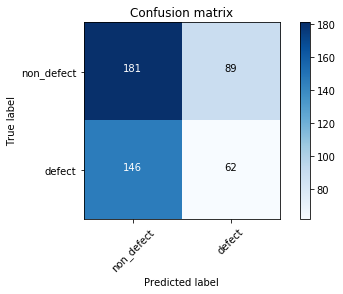

In [0]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

In [0]:
import pickle
with open (src_save+'xgb_densenet12_correct.pkl','wb') as handle:
  pickle.dump(xgb1, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
print (val_x.shape, val_y.shape)

(478, 1000) (478,)


In [0]:
print (predictions)

[0, 0, 0, 0, 5, 5, 0, 4, 0, 8, 0, 5, 0, 0, 4, 11, 0, 2, 0, 5, 0, 0, 0, 0, 5, 5, 0, 5, 2, 5, 0, 7, 0, 4, 11, 5, 0, 0, 0, 0, 5, 0, 0, 9, 11, 0, 0, 0, 6, 5, 0, 5, 5, 1, 10, 5, 2, 0, 8, 0, 5, 5, 5, 0, 5, 0, 6, 10, 0, 5, 0, 0, 2, 0, 0, 10, 0, 2, 5, 4, 1, 0, 0, 0, 2, 3, 0, 0, 8, 5, 10, 5, 0, 10, 10, 11, 5, 2, 5, 0, 0, 0, 10, 1, 0, 3, 8, 2, 8, 4, 5, 5, 0, 0, 2, 0, 0, 11, 10, 0, 0, 10, 5, 0, 0, 0, 0, 11, 4, 0, 1, 0, 10, 2, 5, 0, 0, 0, 0, 2, 11, 0, 0, 0, 2, 0, 0, 10, 0, 11, 0, 2, 0, 5, 0, 0, 0, 0, 0, 5, 6, 11, 0, 3, 7, 10, 0, 5, 5, 0, 5, 8, 0, 5, 0, 0, 5, 5, 0, 11, 6, 0, 8, 10, 0, 10, 0, 5, 0, 0, 5, 5, 0, 0, 6, 0, 1, 0, 5, 0, 8, 0, 5, 0, 8, 5, 5, 8, 0, 10, 0, 0, 5, 0, 11, 0, 0, 4, 5, 0, 0, 0, 0, 2, 5, 5, 3, 0, 7, 0, 6, 7, 0, 0, 0, 5, 0, 4, 0, 5, 0, 0, 0, 0, 0, 0, 3, 5, 0, 0, 7, 2, 0, 5, 0, 0, 5, 10, 0, 0, 0, 0, 5, 1, 5, 10, 10, 5, 0, 10, 8, 11, 0, 6, 0, 0, 10, 5, 0, 0, 5, 2, 0, 5, 8, 0, 0, 5, 11, 0, 0, 2, 0, 4, 5, 2, 5, 0, 0, 5, 8, 0, 10, 5, 0, 0, 4, 3, 11, 8, 0, 0, 0, 10, 5, 0, 0, 0, 0, 0, 1, 

In [0]:
print (val_y)

[ 0  0  5  0  5  5  0  4  0  8  0  5  0  0  4 11  0  2  0  5  0  0  0  0
  5  5  0  5 10  5  0  7  0  4 11  5  0  0  0  0  5  0  2  9 11  0  0  0
  6  5  0  5  5  1  6  5  2  0  8  0  5  5  5  0  5  0  6 10  0  5  0  0
  2  0  0 10  2  2  5  4  6  0  0  0  2  3  0  0  8  5 10  5  0 10 11 11
  5  2  5  0  0  0  0  1  0  3  8  2  8  4  5  5  0  0  2  0  0 11 10  0
  0  6  5  0  0  0  0 11  4  0 11  0 10  2  5  2  0  0  0  2 11  0  0  0
  2  0  0 10  0 10  0  2 11  5  0  0  0  0  0  5  6  6  0  3  7 10  0  5
  5  0  5  8  0  5  0  0  5  5  0 11  6  0  8 10  0 10  0  5  0  0  5  5
  0  0  6  0  1  0  5  0  8  0  5  0  8  5  5  8  0 10  0  0  5  0 11  0
  0  4  5  0  0  0  0  2  5  5  3  0  7  0  6  7  0  0  0  5  0  4  0  5
 11  0  0  0  0  0  3  5  0  0  7  2  0  5  0  0  5 10  0  0  0  0  1  1
  5 10 10  5  0 10  8 11  0  8  0  7  6  5  0  0  5  2  0  5  8  0  7  5
 11  0  0  2  9  4  5  2  5 10  0  5  8  0 10  4  0  0  4  3 11  8  0  0
  0 10  5  0  0  0  0  0  1  5  0  0  0  0  6  0  7

failure_to_label.pkl   manu_big_data		Untitled0.ipynb
label_to_category.pkl  train_data_densenet.npy	xgb_densenet12.pkl


In [0]:
label_data_0

array([ True, False, False, ..., False,  True,  True])

In [0]:
class_names= np.array(['non_defect','defect'])

In [0]:
class_names

array(['non_defect', 'defect'], dtype='<U10')

In [1]:
!pip install --upgrade keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.2.2)


Using TensorFlow backend.


'2.2.2'

In [0]:
from keras.applications.mobilenetv2 import MobileNetV2

In [0]:
from PIL import Image

In [5]:
img = Image.open(src_2+file_list[0])
img = img.resize((1920//4, 2560//4))

NameError: ignored